# Sistema de Recomendação

### Importando Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Instalando Tensorflow e mais algumas dependencias

In [2]:
!pip install tensorflow
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

### Modificando Modelo

In [3]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Adicionando GlobalMaxPooling:

In [4]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

### Carregar bibliotecas

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Função de Extração de Características

In [6]:
def extract_feature(img_path, model):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(224,224))
  img=np.array(img)
  expand_img=np.expand_dims(img,axis=0)
  pre_img=preprocess_input(expand_img)
  result=model.predict(pre_img).flatten()
  normalized_result=result/np.linalg.norm(result)
  return normalized_result

### Extraindo Características

In [7]:
import os

filename_carro=[]
feature_list_carro=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/carro'):
  try:
    filename_carro.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/carro',file))
    feature_list_carro.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/carro',file),model))
  except:
    pass

filename_moto=[]
feature_list_moto=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/moto'):
  try:
    filename_moto.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/moto',file))
    feature_list_moto.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/moto',file),model))
  except:
    pass

filename_relogioPulso=[]
feature_list_relogioPulso=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/relogio'):
  try:
    filename_relogioPulso.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/relogio',file))
    feature_list_relogioPulso.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/relogio',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


### Usando NearestNeighbors

In [8]:
from sklearn.neighbors import NearestNeighbors

neighbors_carro=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_carro.fit(feature_list_carro)

distance_carro, indices_carro = neighbors_carro.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/carro/001.jpg", model)])


neighbors_moto=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_moto.fit(feature_list_moto)

distance_moto, indices_moto = neighbors_moto.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/moto/001.jpg", model)])


neighbors_relogioPulso=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_relogioPulso.fit(feature_list_relogioPulso)

distance_relogioPulso, indices_relogioPulso = neighbors_relogioPulso.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/relogio/001.jpg", model)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


### Exibindo Imagens Semelhantes

#### Carro

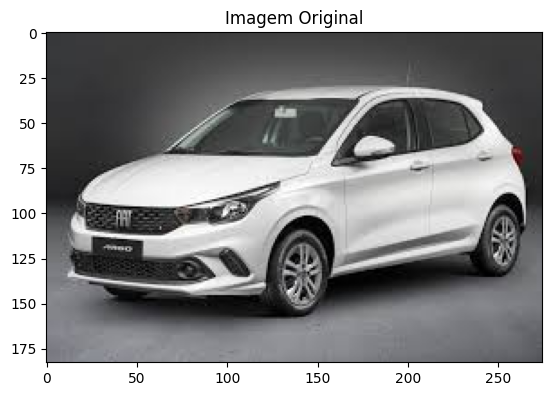

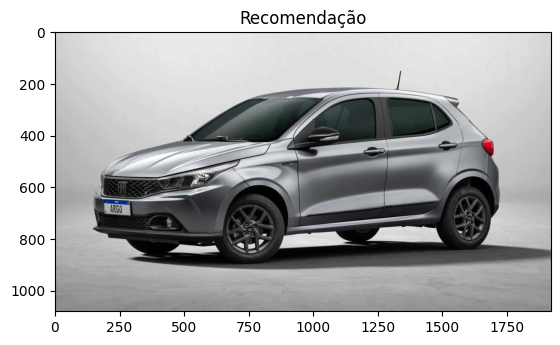

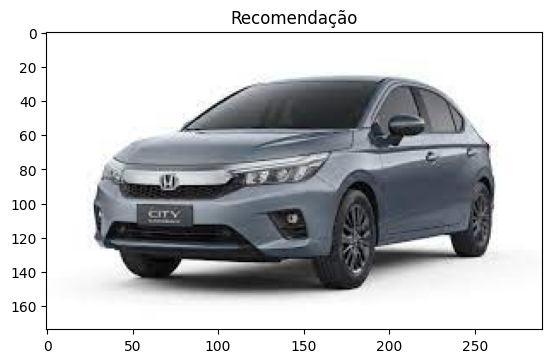

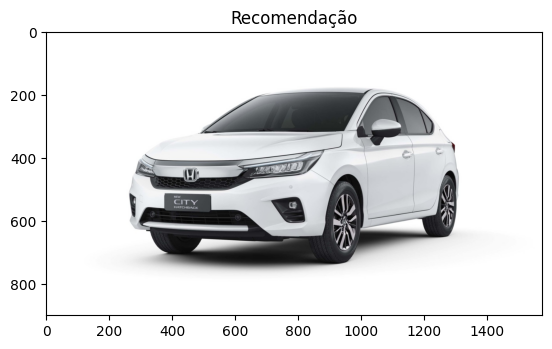

In [9]:
plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/carro/001.jpg"))
plt.title("Imagem Original")
plt.show()

for file_carro in indices_carro[0][1:4]:
  plt.imshow(plt.imread(filename_carro[file_carro]))
  plt.title("Recomendação")
  plt.show()

#### Moto

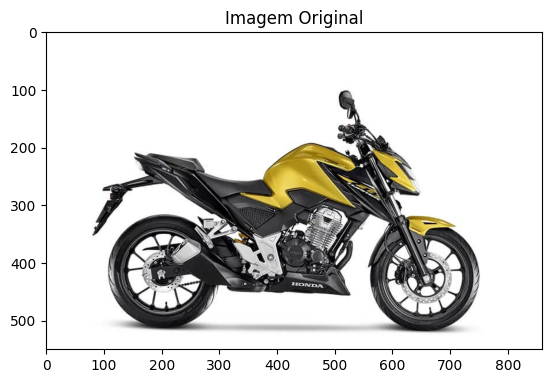

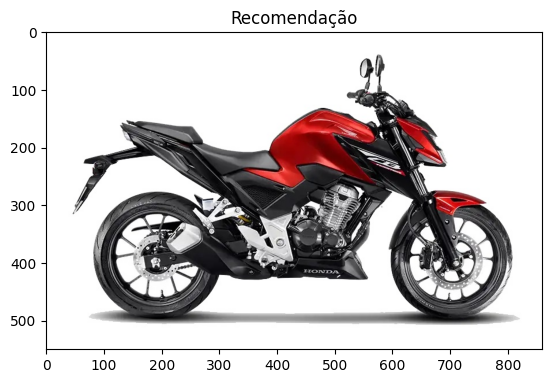

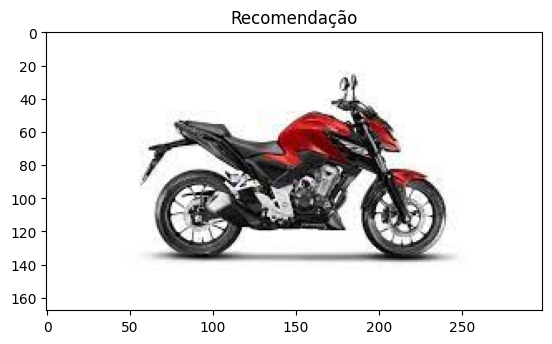

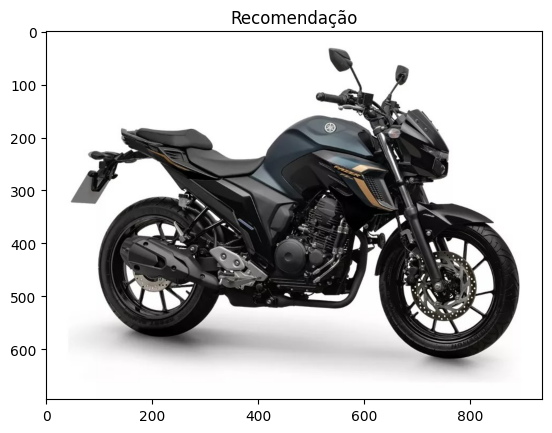

In [10]:
plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/moto/001.jpg"))
plt.title("Imagem Original")
plt.show()

for file_moto in indices_moto[0][1:4]:
  plt.imshow(plt.imread(filename_moto[file_moto]))
  plt.title("Recomendação")
  plt.show()

#### Relogio de Pulso

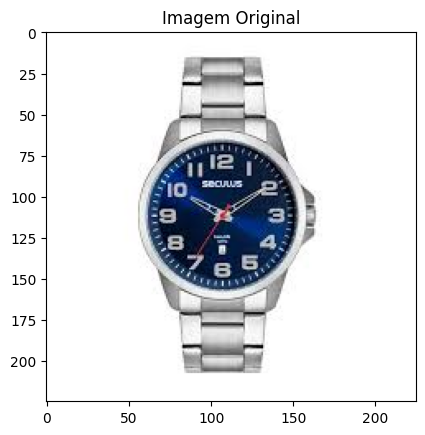

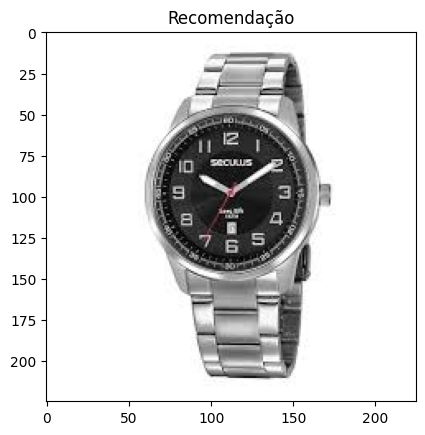

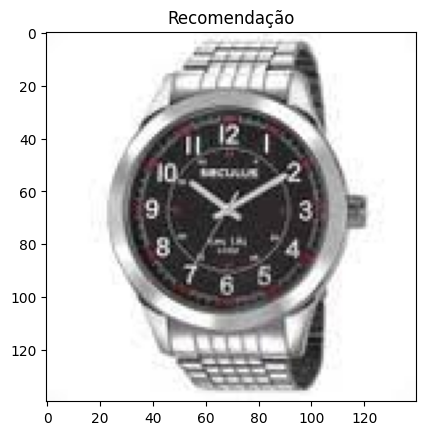

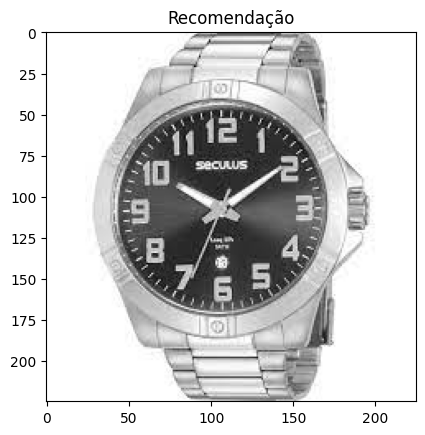

In [11]:
plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/DIO/dataset-recomendacao/relogio/001.jpg"))
plt.title("Imagem Original")
plt.show()

for file_relogioPulso in indices_relogioPulso[0][1:4]:
  plt.imshow(plt.imread(filename_relogioPulso[file_relogioPulso]))
  plt.title("Recomendação")
  plt.show()